# Problem 3

In [91]:
library("tidyverse")
library("jpeg")
library("scales")
library("zoo")

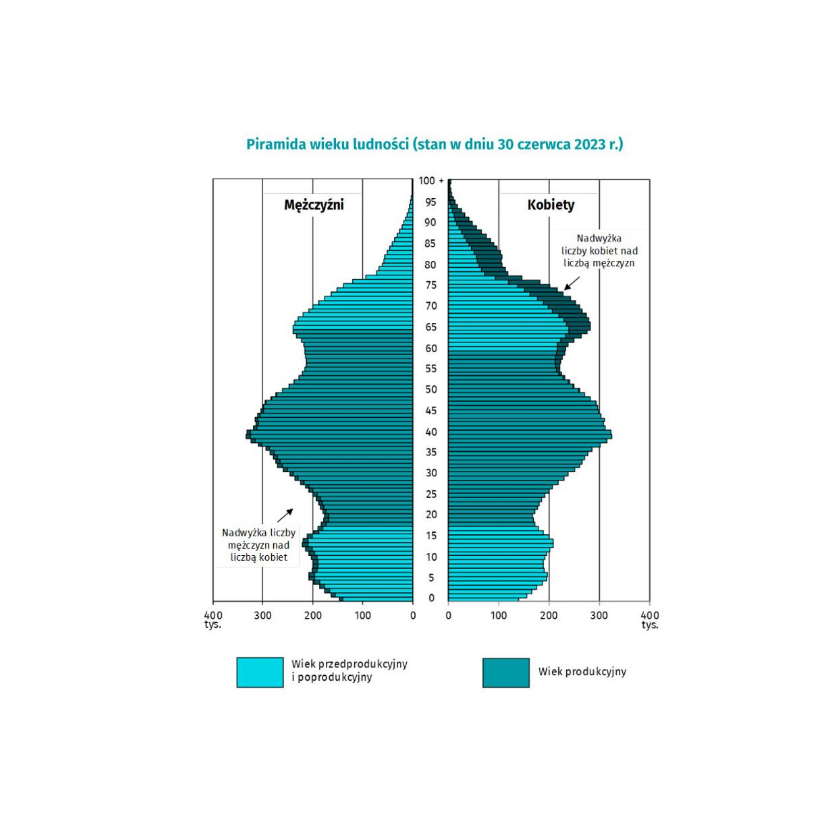

In [103]:
jj <- readJPEG("Wykres_demografia.jpg", native = TRUE)
plot(0:1, 0:1, type="n", ann = FALSE, axes = FALSE)
rasterImage(jj, 0, 0, 1, 1)

In [212]:
student_houses <- read.csv2("dane3_kopia_zapasowa/Domy studenckie.csv")
students_in_houses <- read.csv2("dane3_kopia_zapasowa/Korzystający z domów studenckich.csv")
spots_in_student_houses <- read.csv2("dane3_kopia_zapasowa/Miejsca w domach studenckich.csv")
students <- read.csv2("dane3_kopia_zapasowa/Studenci uczelni.csv")
profits <- read.csv2("dane3_kopia_zapasowa/przychody.csv")
real_estate <- read.csv2("dane3_kopia_zapasowa/ceny_mieszkan.csv")

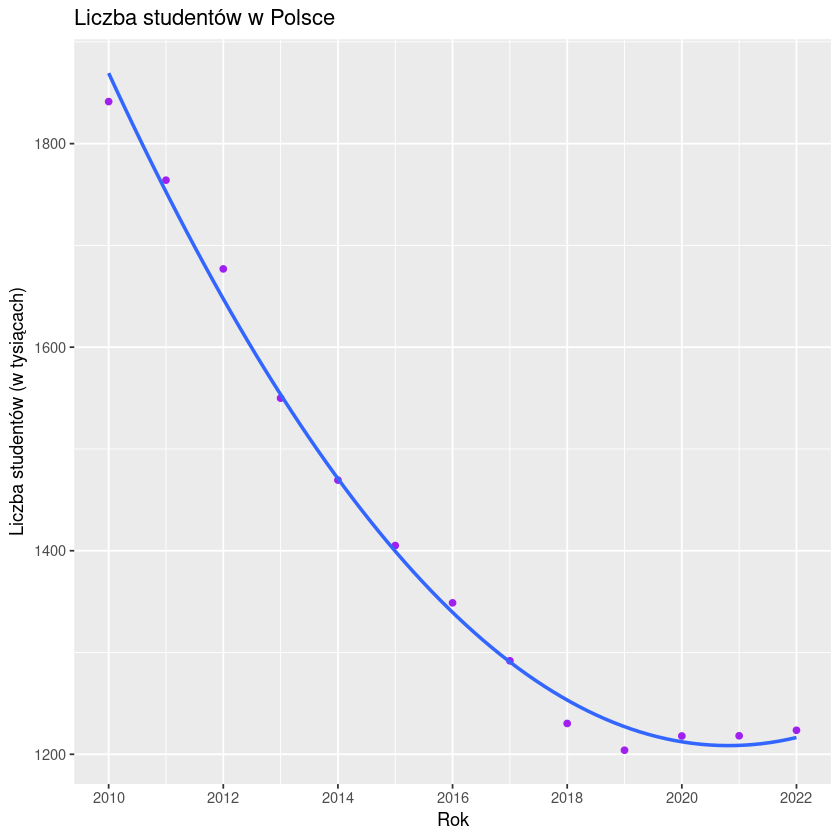

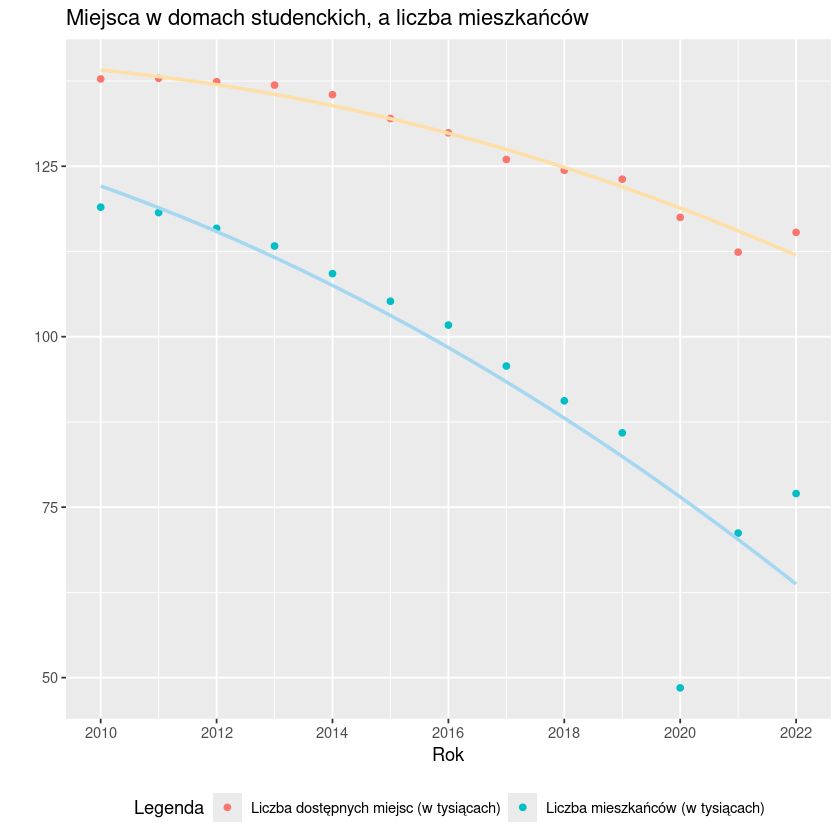

In [213]:
students <- students |> select(opis_okres, wartosc, typ_informacji)
spots_in_student_houses <- spots_in_student_houses |> select(opis_okres, wartosc, typ_informacji)
students_in_houses <- students_in_houses |> select(opis_okres, wartosc, typ_informacji)
students_in_houses$wartosc <- students_in_houses$wartosc |> na.approx()
students_in_houses$typ_informacji <- "Liczba mieszkańców (w tysiącach)"
spots_in_student_houses$typ_informacji <- "Liczba dostępnych miejsc (w tysiącach)"
merged_houses <- rbind(spots_in_student_houses, students_in_houses)
students |>
  ggplot(aes(x = opis_okres, y = wartosc)) +
  geom_point(color = "purple") +
  scale_x_continuous(breaks = pretty_breaks()) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Liczba studentów w Polsce", x = "Rok", y = "Liczba studentów (w tysiącach)")
merged_houses|>
  group_by(opis_okres) |>
  ggplot(aes(x = opis_okres, y = wartosc, color = typ_informacji)) +
  geom_point() +
  scale_x_continuous(breaks = pretty_breaks()) +
  labs(title = "Miejsca w domach studenckich, a liczba mieszkańców", x = "Rok", y ="") +
  geom_smooth(data = subset(merged_houses, typ_informacji == "Liczba mieszkańców (w tysiącach)"), method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "#a5d8f0") +
  geom_smooth(data = subset(merged_houses, typ_informacji == "Liczba dostępnych miejsc (w tysiącach)"), method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "#fddfa7") +
  guides(color = guide_legend(title = "Legenda")) +
  theme(legend.position = "bottom")

In [214]:
profits <- profits |> select(opis_okres, wartosc, typ_informacji)

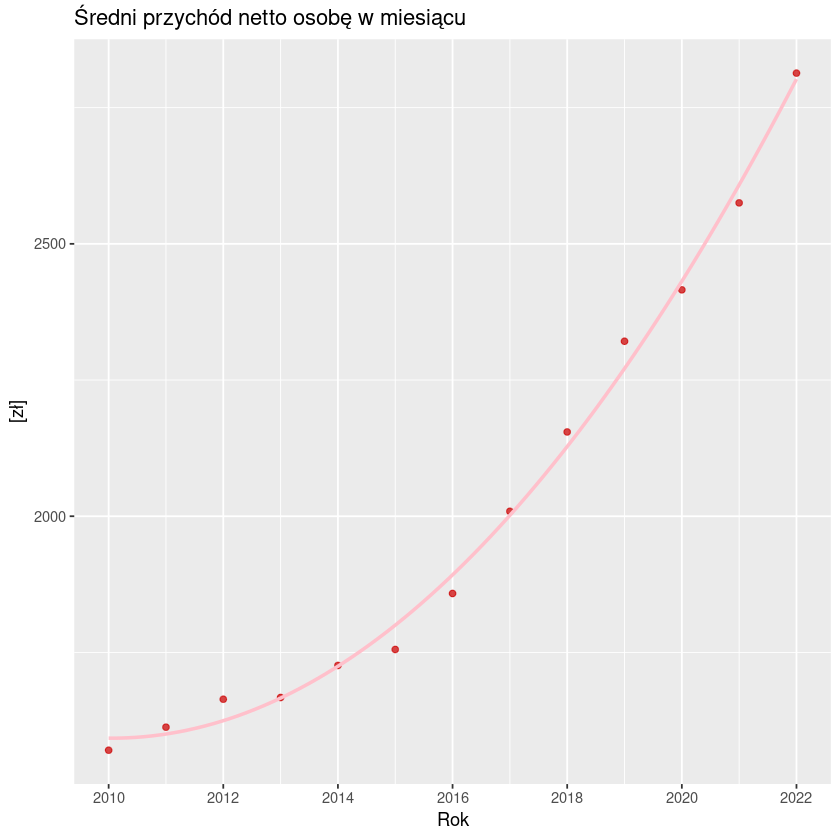

In [225]:
profits |>
  ggplot(aes(x = opis_okres, y = wartosc)) +
  geom_point(color = "#cf1414c9") +
  scale_x_continuous(breaks = pretty_breaks()) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "pink") +
  labs(title = "Średni przychód netto osobę w miesiącu", x = "Rok", y ="[zł]")

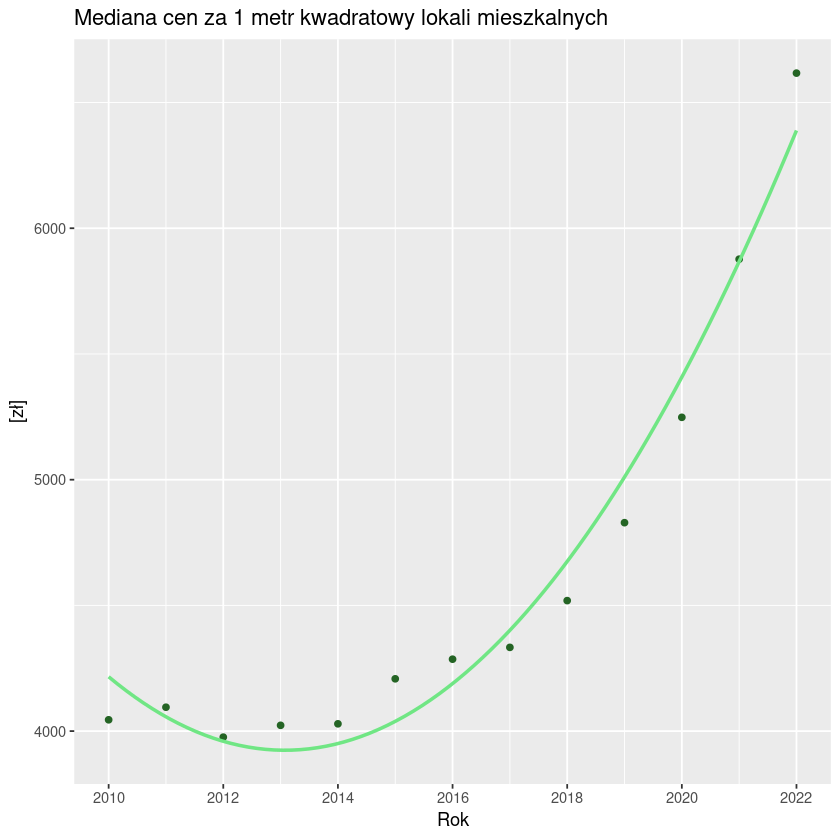

In [226]:
real_estate |> 
  select(opis_okres, wartosc) |>
  ggplot(aes(x = opis_okres, y = wartosc)) +
  geom_point(color = "#246424") +
  scale_x_continuous(breaks = pretty_breaks()) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "#70e684") +
  labs(title = "Mediana cen za 1 metr kwadratowy lokali mieszkalnych", x = "Rok", y ="[zł]")

In [240]:
inflation <- data.frame(inflacja = (real_estate$wartosc[-1] - real_estate$wartosc[-13]) / real_estate$wartosc[-13], rok = real_estate$opis_okres[-1])

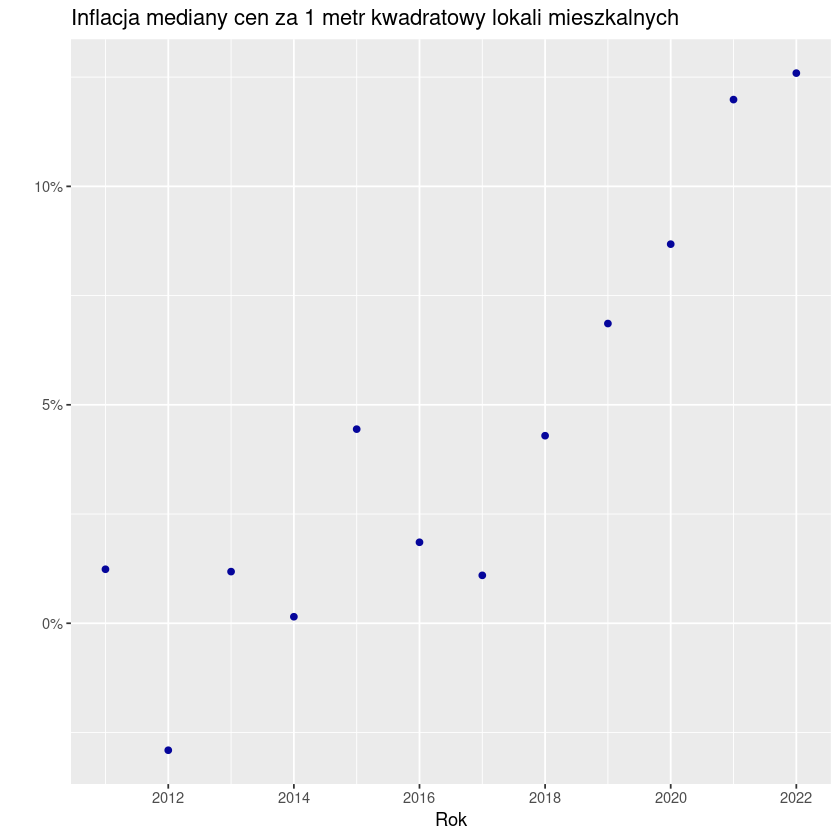

In [248]:
inflation |>
  ggplot(aes(x = rok, y = inflacja)) +
  geom_point(color = "#05059b") +
  scale_x_continuous(breaks = pretty_breaks()) +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Inflacja mediany cen za 1 metr kwadratowy lokali mieszkalnych", x = "Rok", y ="")